In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
data = pd.read_excel(url)

In [2]:

data = data.dropna(subset=['InvoiceNo'])

data.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [3]:
data.shape

(541909, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


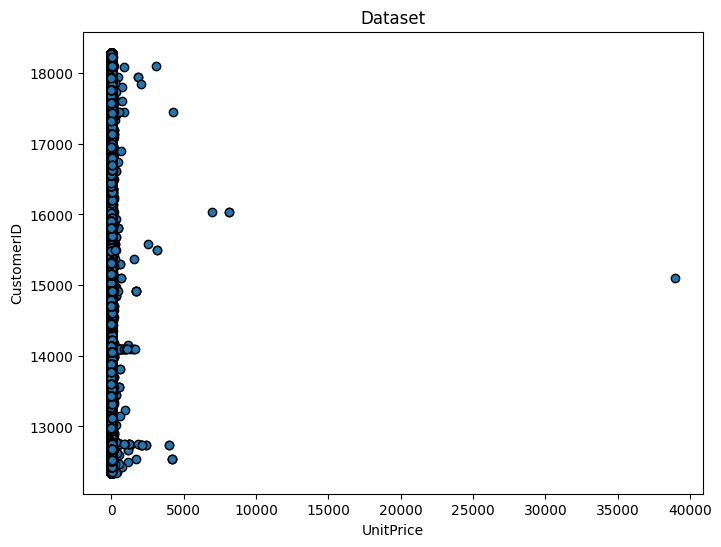

In [5]:
plt.figure(figsize= (8,6))

plt.scatter(data["UnitPrice"],data["CustomerID"], marker= 'o', edgecolors= 'k')
plt.title("Dataset")
plt.xlabel("UnitPrice")
plt.ylabel("CustomerID")
plt.show()

In [6]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn.impute import SimpleImputer

minibatch_kmeans = MiniBatchKMeans(n_clusters=0.001, n_init='auto')

# numeric_data = data.select_dtypes(include=['float64'])
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Impute missing values (replace NaN with the mean)
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(numeric_data)

# Initialize the MiniBatchKMeans clustering model
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)  # You can specify the number of clusters
cluster_labels = minibatch_kmeans.fit_predict(imputed_data)


C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


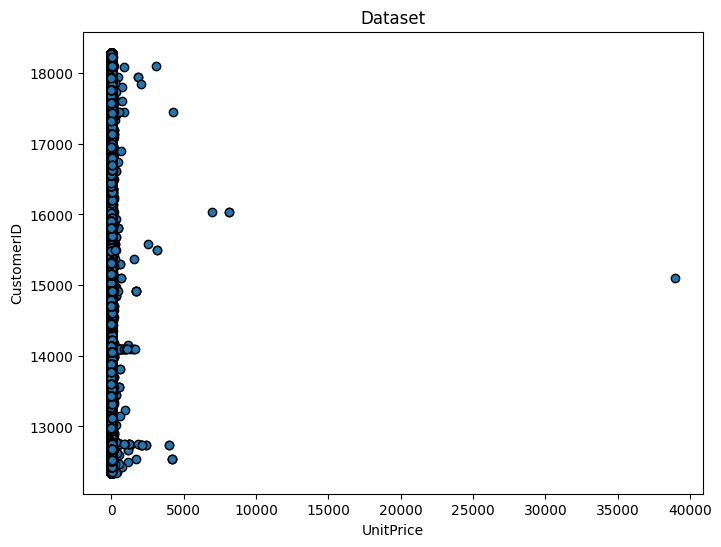

In [7]:
plt.figure(figsize= (8,6))

plt.scatter(data["UnitPrice"],data["CustomerID"], marker= 'o', edgecolors= 'k')
plt.title("Dataset")
plt.xlabel("UnitPrice")
plt.ylabel("CustomerID")
plt.show()

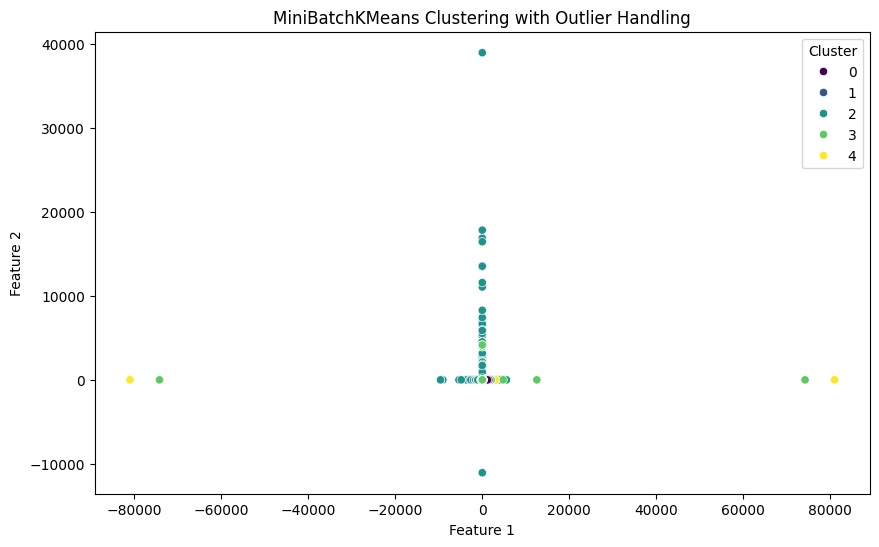

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming that you have two columns you want to use for the scatter plot, replace 'feature1' and 'feature2' with actual column names.
feature1 = 'Quantity'
feature2 = 'CustomerID'

# Create a DataFrame for the scatter plot
scatter_data = pd.DataFrame({'Feature 1': imputed_data[:, 0], 'Feature 2': imputed_data[:, 1], 'Cluster': cluster_labels})

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Cluster', data=scatter_data, palette='viridis')
plt.title('MiniBatchKMeans Clustering with Outlier Handling')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [9]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Select numeric columns
numeric_data = data.select_dtypes(include=['float64'])

# Impute missing values (replace NaN with the mean)
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(numeric_data)



In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define the K-means model
model_km = KMeans(n_clusters=2, random_state=42, n_init=100)

# Fit the K-means model to your data
kmeans_labels = model_km.fit_predict(data_imputed)

# Calculate the silhouette score for K-means clustering
kmeans_silhouette = silhouette_score(data_imputed, kmeans_labels)
print("Silhouette Score for K-means Clustering is", kmeans_silhouette)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define the K-means model
model_km = KMeans(n_clusters=2, random_state=42, n_init=100)

# Fit the K-means model to your data
kmeans_labels = model_km.fit_predict(data_imputed)

# Calculate the silhouette score for K-means clustering
kmeans_silhouette = silhouette_score(data_imputed, kmeans_labels)
print("Silhouette Score for K-means Clustering is", kmeans_silhouette)

In [ ]:
import matplotlib.pyplot as plt

# Visualize the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(data["UnitPrice"], data["CustomerID"], c=kmeans_labels, cmap='viridis', marker='o', edgecolors='k')
plt.title(f"K-means Clustering (Silhouette Score: {kmeans_silhouette:.2f})")

plt.subplot(1, 2, 2)
plt.scatter(data["UnitPrice"], data["CustomerID"], c=sc_labels, cmap='viridis', marker='o', edgecolors='k')
plt.title(f"Spectral Clustering (Silhouette Score: {sc_silhouette:.2f})")
plt.colorbar(label="Class")
plt.show()
